<a href="https://colab.research.google.com/github/PranayJagtap06/ML_Projects/blob/main/US EV Market Size Analysis/EVMarketSizeAnalysisUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EV Market Size Analysis US
In this project I will do a EV market size analysis in the US. For this I will use the __[dataset](https://statso.io/market-size-of-evs-case-study/#google_vignette)__ provided at **Statso.io**. The provided dataset contains the following columns, each representing different aspects of the electric vehicle (EV) population in the United States:

 - *VIN (1-10)*: Partial Vehicle Identification Number.
 - *County*: The county in which the vehicle is registered.
 - *City*: The city in which the vehicle is registered.
 - *State*: The state in which the vehicle is registered. It appears that this dataset may be focused on Washington (WA) state.
 - *Postal Code*: The postal code where the vehicle is registered.
 - *Model Year*: The year of the vehicle model.
 - *Make*: The manufacturer of the vehicle.
 - *Model*: The model of the vehicle.
 - *Electric Vehicle Type*: The type of electric vehicle, e.g., Battery Electric Vehicle (BEV).
 - *Clean Alternative Fuel Vehicle (CAFV) Eligibility*: Eligibility status for clean alternative fuel vehicle programs.
 - *Electric Range*: The maximum range of the vehicle on a single charge (in miles).
 - *Base MSRP*: The Manufacturer’s Suggested Retail Price.
 - *Legislative District*: The legislative district where the vehicle is registered.
 - *DOL Vehicle ID*: Department of Licensing Vehicle Identification.
 - *Vehicle Location*: Geographic coordinates of the vehicle location.
 - *Electric Utility*: The electric utility service provider for the vehicle’s location.
 - *2020 Census Tract*: The census tract for the vehicle’s location.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing Libraries and Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [ ]:
from plotly.offline import init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
import plotly.express as px
import plotly.io as pio
pio.templates.default = 'seaborn'
pio.renderers.default = 'colab'

In [ ]:
# pio.templates

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Electric_Vehicle_Population_Data.csv')

### Inspecting Dataset

In [ ]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [ ]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [ ]:
df.dropna(inplace=True)

### EDA
Let’s start with analyzing the EV Adoption Over Time by visualizing the number of EVs registered by model year. It will give us an insight into how the EV population has grown over the years

In [ ]:
fig1 = px.bar(data_frame=df, x=df['Model Year'].value_counts().sort_index().index, y=df['Model Year'].value_counts().sort_index().values,
              title='EV Adoption Over Time', color=df['Model Year'].value_counts().sort_index().index, color_continuous_scale=px.colors.sequential.Viridis_r, height=600)
# fig1
fig1.update_xaxes(title_text='Model Year', nticks=len(df['Model Year'].unique()), tickangle=-45)
fig1.update_yaxes(title_text='Number of Vehicles Registered')

From the above chart it is clear that the adoption rate of EVs has been continuously increasing over the time. There has been a rapid growth after 2016 till 2023, with drastic increase in EV adoption in year 2023.

Now, let’s start by selecting the top 3 counties based on EV registrations and then analyze the distribution of EVs within the cities of those counties

In [ ]:
top_counties = df.County.value_counts().head(3).index
top_counties_data = df[df.County.isin(top_counties)]
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

In [ ]:
top_cities = ev_city_distribution_top_counties.head(10)

In [ ]:
fig2 = px.bar(data_frame = top_cities, y='City', x='Number of Vehicles', color='County', title='Top Cities in Top Counties by EV Registrations')
fig2.update_yaxes(title_text='City', nticks=len(top_cities.City.unique()))
fig2.update_xaxes(title_text='Number of Vehicles Registered')

The above graph compares the number of electric vehicles registered in various cities within three counties: King, Snohomish, and Pierce. The horizontal bars represent cities, and their length corresponds to the number of vehicles registered, colour-coded by county. Here are the key findings from the above graph:
 - Seattle which is in the King county has tha heighest number of EVs registered and outgrows all other cities.
 - Bellevue and Redmond are also from King county and are next cities with heighest EVs registered, but they still have considerably less registrations than Seattle.
 - Bothell from Snohomish county has a moderate number of EV registrations.
 - Tacoma representing Pierce county has the fewest number of EV registrations
 - The cities from King county seems to dominate the EV registrations among the 3 counties.
 - The graph shows that the EV adoption is not uniform across the cities and is more concentrated in certain cities.

Next, let’s explore the types of electric vehicles represented in this dataset. Understanding the breakdown between different EV types, such as Battery Electric Vehicles (BEV) and Plug-in Hybrid Electric Vehicles (PHEV), can provide insights into consumer preferences and the adoption patterns of purely electric vs. hybrid electric solutions. So, let’s visualize the distribution of electric vehicle types to see which categories are most popular among the registered vehicles:

In [ ]:
fig3 = px.bar(x=df['Electric Vehicle Type'].value_counts().values, y=df['Electric Vehicle Type'].value_counts().index, color=df['Electric Vehicle Type'].value_counts().index, color_discrete_sequence=px.colors.sequential.Viridis_r, title='Distribution of Electric Vehicle Types')
fig3.update_xaxes(title_text='Number of Vehicles Registered')
fig3.update_yaxes(title_text='Electric Vehicle Type', nticks=len(df['Electric Vehicle Type'].value_counts().index.unique()))

The graph shows that BEVs are more preferred type of EV than PHVs among the EV registered in the US.

Let’s now focus on the popularity of electric vehicle manufacturers and models among the registered vehicles. This analysis will help us identify which manufacturers and specific models dominate the EV market, potentially indicating consumer preferences, brand loyalty, and the success of various manufacturers’ strategies in promoting electric mobility.

In [ ]:
ev_make_distribution = df.Make.value_counts().head(10).sort_values(ascending=False).reset_index()

In [ ]:
fig4 = px.bar(y='index', x='Make', title='Top 10 Popular EV Makes', color='index',
             color_discrete_sequence=px.colors.sequential.Viridis_r, data_frame=ev_make_distribution)
fig4.update_xaxes(title_text='Number of Vehicles Registered')
fig4.update_yaxes(title_text='Make')

The graph shows that:
 - TESLA has the heighest EV registrations leading the EV registrations by a great margin.
 - NISSAN is the second heighest popular manufacturer followed by CHEVROLET, though both have significantly fewer registration than TESLA.
 - Rest of the EV manufacturers are in decreasing order of EV registrations.

Next, let’s drill down into the most popular models within these top manufacturers to get a more detailed understanding of consumer preferences at the model level.

In [ ]:
top_makes_data = df[df['Make'].isin(ev_make_distribution.head(3).set_index('index').index)]
ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

In [ ]:
fig5 = px.bar(data_frame=ev_model_distribution_top_makes.head(10), x='Number of Vehicles', y='Model', color='Make',
              color_discrete_sequence=px.colors.sequential.Viridis_r, title='Top Models in Top 3 Makes by EV Registrations')
fig5.update_xaxes(title_text='Number of Vehicles Registered')
fig5.update_yaxes(title_text='Model')

The above graph shows the distribution of electric vehicle registrations among different models from the top three manufacturers: TESLA, NISSAN, and CHEVROLET.
From the graph we can infer that:
 - TESLA's MODEL Y and MODEL 3 are the most registered EVs, with MODEL Y having the heighest registrations.
 - NISSAN's LEAF is 3rd most registered EV and a non-TESLA EV.
 - CHEVROLET's BOLT EV and VOLT are next in the ranking.
 - NISSAN's ARIYA and CHEVROLET's BOLT EUV and SPARK have the least number of registrations.

Next, we’ll explore the electric range of vehicles, which is a critical factor for analyzing the market size of electric vehicles. The electric range indicates how far an EV can travel on a single charge, and advancements in battery technology have been steadily increasing these ranges over the years. So, let’s look at the distribution of electric ranges in the dataset and identify any notable trends, such as improvements over time or variations between different vehicle types or manufacturers.

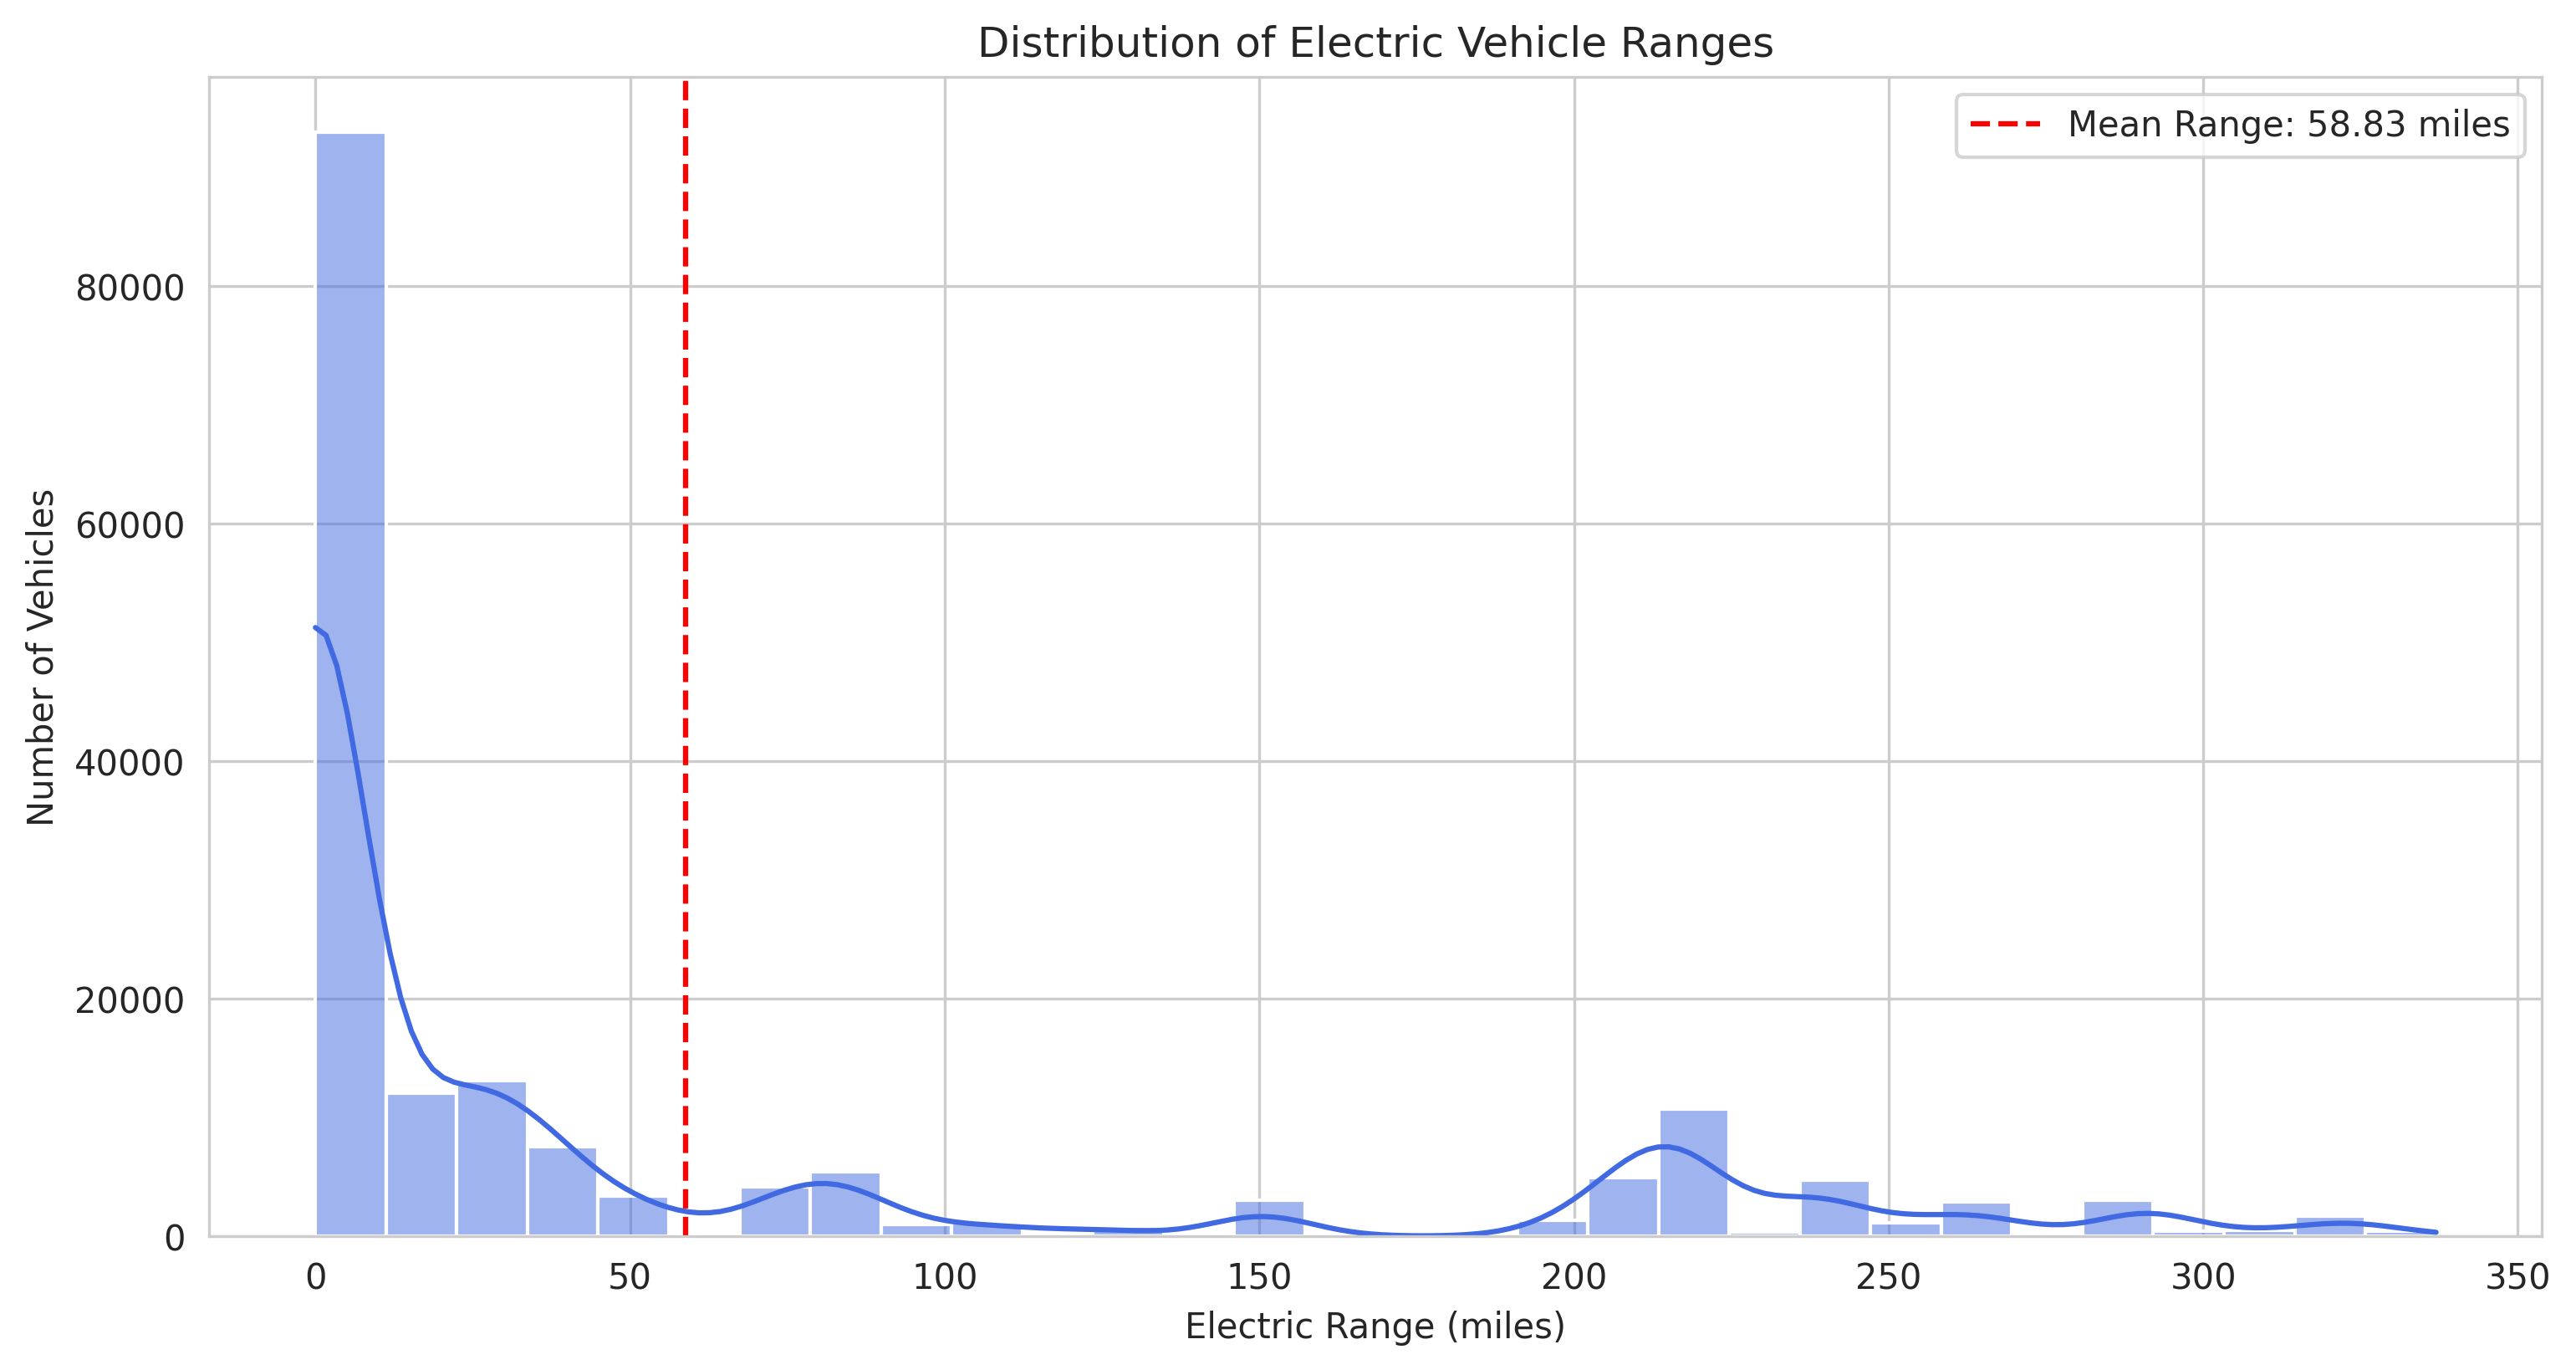

In [ ]:
plt.figure(figsize=(12, 6), dpi=300)
sns.histplot(df['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(df['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {df["Electric Range"].mean():.2f} miles')
plt.legend()

The above graph shows the mean electric range at 58.83 miles. The graph shows that:
 - The heighest number EVs are with electric range as low as 50 miles, which is relatively low compared to the highest ranges shown in the graph.
 - The number of EV with higher ranges is much less frequent.
 - Despite the presence of electric vehicles with ranges that extend up to around 350 miles, the majority of the vehicles have a range below the mean.

Now, let’s delve into the trend of electric ranges over model years, which can provide insights into how advancements in battery technology and vehicle design have influenced the electric range capabilities of electric vehicles over time. A positive trend in this analysis would indicate continuous improvements, offering consumers EVs with longer driving ranges and potentially addressing one of the major concerns regarding the EV market (range anxiety).

In [ ]:
avg_range_by_year = df.groupby('Model Year')['Electric Range'].mean().reset_index()
fig6 = px.line(data_frame=avg_range_by_year, x='Model Year', y='Electric Range', markers=True, title='Average Electric Range by Model Year',
              height=600)
fig6.update_xaxes(title_text='Model Year', nticks=len(df.groupby('Model Year')['Electric Range'].mean().reset_index()['Model Year']),
                  tickangle=-45)
fig6.update_yaxes(title_text='Average Electric Range (miles)')

The above graph shows the progression of the average electric range of vehicles from around the year 2000 to 2024. Key findings from the graph:

 - There is a general upward trend in the average electric range of EVs over the years, indicating improvements in technology and battery efficiency.
 - There is a noticeable peak around the year 2020 when the average range reaches its highest point.
 - Following 2020, there’s a significant drop in the average range, which could indicate that data for the following years might be incomplete or reflect the introduction of several lower-range models.
 - After the sharp decline, there is a slight recovery in the average range in the most recent year shown on the graph.

The data suggest that while there have been fluctuations, the overall trend over the last two decades has been toward increasing the electric range of EVs.

Next, let’s explore how electric ranges vary among the top manufacturers and models. This analysis can reveal how different manufacturers are addressing the crucial aspect of electric range and highlight which models stand out for their superior range capabilities.

In [ ]:
avg_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()
fig7 = px.bar(data_frame=avg_range_by_model.head(10), x='Electric Range', y='Model', title='Top 10 Models by Average Electric Range in Top Makes', color='Make', color_discrete_sequence=px.colors.sequential.Viridis_r)
fig7.update_xaxes(title_text='Average Electric Range (miles)')
fig7.update_yaxes(title_text='Model')

Among the models listed, the TESLA ROADSTER boasts the greatest average electric range. The majority of the top spots are held by TESLA models (ROADSTER, MODEL S, MODEL X, and MODEL 3), suggesting that TESLA vehicles generally offer superior electric ranges. The CHEVROLET BOLT EV stands out among CHEVROLET models, offering a significantly greater range than the VOLT and S-10 PICKUP from the same manufacturer. Models like the NISSAN LEAF and CHEVROLET SPARK fall into the lower half of the chart, indicating their average ranges are comparatively modest.

### Estimated Market Size Analysis of Electric Vehicles in the United States

Next, we’ll proceed to estimate the market size of electric vehicles in the United States. Our first step will be to tally the number of EVs registered annually.

In [ ]:
ev_registration_counts = df['Model Year'].value_counts().sort_index()
ev_registration_counts

1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: Model Year, dtype: int64

The dataset at hand provides information on the number of electric vehicles registered annually from 1997 to 2024. However, the data for 2024 is not complete as it only includes registrations up to March. Here’s a brief overview of recent years’ EV registrations:

 - 19,063 EVs were registered in 2021.
 - This number rose to 27,708 EVs in 2022.
 - In 2023, there was a substantial increase to 57,519 EVs.
 - As of now, 7,072 EVs have been registered in 2024, indicating that the data for this year is still incomplete.

To predict the total number of EVs likely to be registered in 2024, we can use a growth rate-based approach using data from previous years.

We’ll compute the Compound Annual Growth Rate (CAGR) between 2023 (the most recent year with complete data) and an earlier year to estimate the figures for 2024. Furthermore, this growth rate can be used to project the market size for the upcoming five years. Let’s move forward with these calculations.

In [ ]:
from scipy.optimize import curve_fit

# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{2024: 79079.2066611501, 2025: 119653.95934090775, 2026: 181047.21317328632, 2027: 273940.7335817853, 2028: 414496.9933533305, 2029: 627171.2689549965}


Now, let’s plot the estimated market size data.

In [ ]:
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

In [ ]:
actual_df = pd.DataFrame(data={'years':actual_years, 'ev registered':actual_values})

In [ ]:
forecast_df = pd.DataFrame(data={'years':forecast_years_full, 'ev registered':forecasted_values_full})

In [ ]:
actual_df['registration type'] = ['Actual Registrations' for _ in actual_df.years]

In [ ]:
forecast_df['registration type'] = ['Forecasted Registrations' for _ in forecast_df.years]

In [ ]:
ev_registration_df = pd.concat([actual_df, forecast_df], ignore_index=True)

In [ ]:
fig8 = px.line(data_frame=ev_registration_df, x='years', y='ev registered', color='registration type', symbol='registration type',
              title='Current & Estimated EV Market', height=600)
fig8.update_xaxes(title_text='Year', nticks=len(ev_registration_df.years), tickangle=-45)
fig8.update_yaxes(title_text='Number of EV Registrations')

From the graph, we can observe:

 - The actual number of EV registrations was relatively low and stable until approximately 2010. After this point, there was a consistent and sharp increase, indicating a substantial rise in EV adoption.
 - The predicted EV registrations suggest an even more pronounced increase in the near future, with the number of registrations anticipated to surge in the upcoming years.

Considering the increasing trend in actual EV registrations and the projected growth according to the forecast data, we can infer that the EV market size is set to grow significantly. The sharp rise in predicted registrations indicates that the adoption of EVs by consumers is increasing, and this trend is expected to persist. In summary, the data signals a bright future for the EV industry, demonstrating a considerable shift in consumer preferences and a potential surge in related investment and business opportunities.